<a href="https://colab.research.google.com/github/Amolrakhunde/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Amol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


# **Initializing**

In [94]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#changed excel file to csv file
df = pd.read_csv('/content/drive/MyDrive/CapStone Projects/Credit Card Default Prediction/updated default of credit card clients.csv')

In [97]:
#take a first of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Data Cleaning**

In [98]:
#shape of data
df.shape

(30000, 25)

In [99]:
#basic information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [100]:
#summary of dataset
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [101]:
#check for na values in dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [102]:
#check for null values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [103]:
#check for any duplicates
len(df[df.duplicated()])

0

- Dataset dose not contains any NA values, null values and duplicates.

# <b> Data Description </b>



In [104]:
#columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [105]:
df.shape

(30000, 25)


### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:
* **ID**: Unique ID of each client
* **LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* **Gender**: 1 = male; 2 = female
* **Education**: 1 = graduate school; 2 = university; 3 = high school; 4 = others
* **Marital status**: 1 = married; 2 = single; 3 = others).
* **Age**: Age in years

 ## **History of past payment.**
 
### We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* **PAY_0**: Repayment status in September, 2005

* **PAY_2**: Repayment status in August, 2005

* **PAY_3**: Repayment status in July, 2005

* **PAY_4**: Repayment status in June, 2005

* **PAY_5**: Repayment status in May, 2005

* **PAY_6**: Repayment status in April, 2005 


## **Amount of bill statement (NT dollar).**

* **BILL_AMT1**: Amount of bill statement in September, 2005

* **BILL_AMT2**: Amount of bill statement in August, 2005

* **BILL_AMT3:** Amount of bill statement in July, 2005
* **BILL_AMT4**: Amount of bill statement in June, 2005

* **BILL_AMT5**: Amount of bill statement in May, 2005

* **BILL_AMT6**: Amount of bill statement in April, 2005

## **Amount of previous payment (NT dollar).**

* **PAY_AMT1**: Amount of previous payment in September, 2005

* **PAY_AMT2**: Amount of previous payment in August, 2005

* **PAY_AMT3**: Amount of previous payment in July, 2005
* **PAY_AMT4**: Amount of previous payment in June, 2005
* **PAY_AMT5**: Amount of previous payment in May, 2005

* **PAY_AMT6**: Amount of previous payment in April, 2005

* **default.payment.next.month**: Default payment (1=yes, 0=no)

# **Data Preprocessing**

**Changing name of some columns for simplicity and better understanding**

In [106]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [107]:
#check for columns name
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [108]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [109]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,No


# **Exploratory Data Analysis**

## **IsDefaulter**

```
# This is formatted as code
```



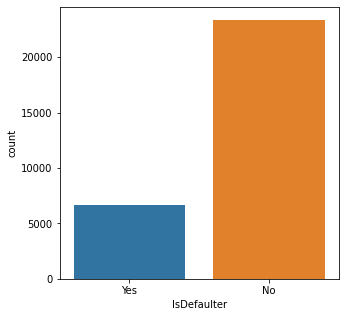

In [110]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

- Both classes are not in proportion that is we have imbalanced dataset.

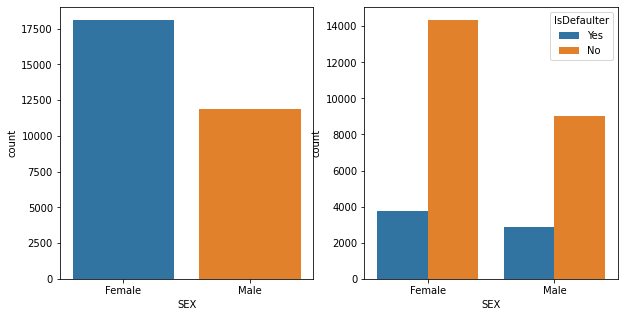

In [111]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

## **EDUCATION**

In [112]:
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

- In education column, values such as 5,6 and 0 are unknown. Lets combine those values as others.

In [113]:
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})

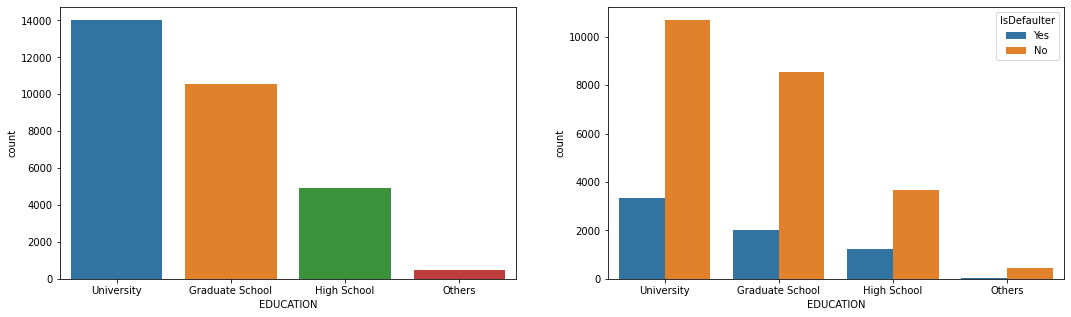

In [114]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

## **MARRIAGE**

In [115]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

- In marriage column, 0 values are not known. Combine those values in others category.

In [116]:
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

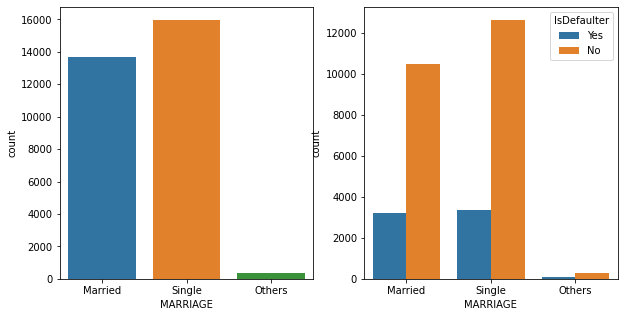

In [117]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

## **AGE**

In [118]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

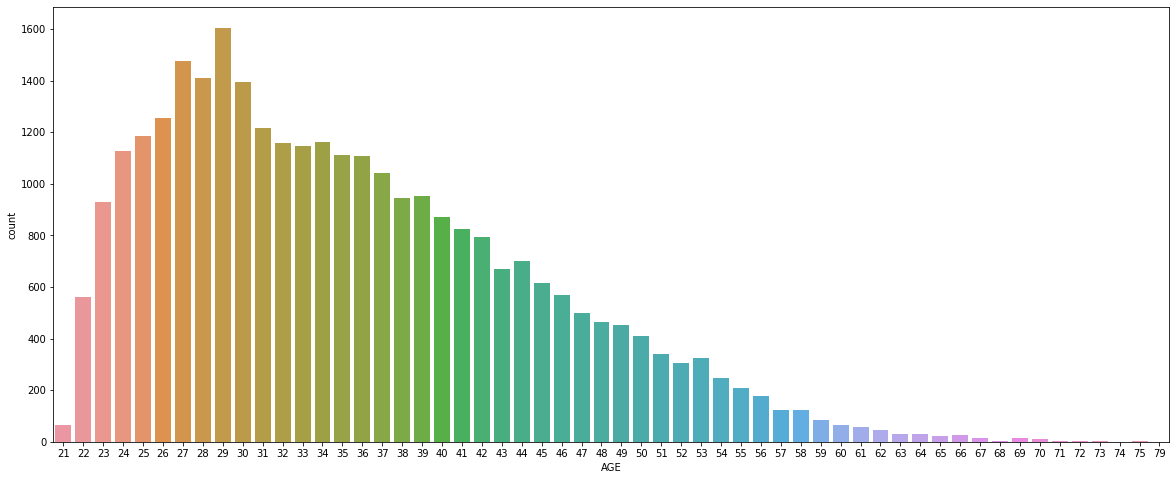

In [119]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

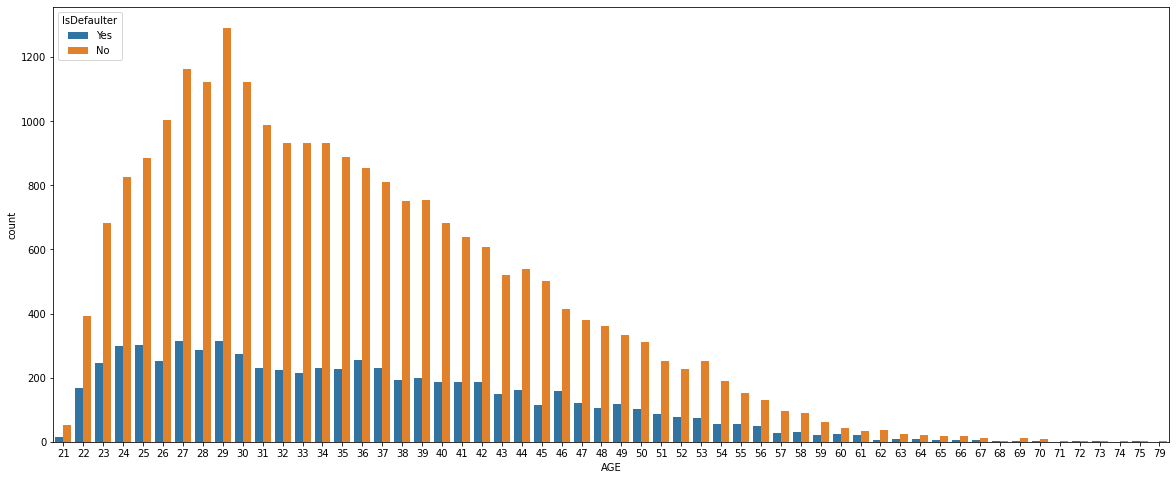

In [120]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

## **Label Incoding**

In [121]:
#label encoding
encoders_nums = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1, "No":0}}

df = df.replace(encoders_nums)

In [122]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,0,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## **One Hot Encoding**

In [123]:
df = pd.get_dummies(df, columns = ['EDUCATION', 'MARRIAGE'])

In [124]:
df.shape

(30000, 30)

In [125]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [126]:
df.shape

(30000, 28)

In [127]:
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [128]:
df.shape

(30000, 80)

In [129]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [130]:
df.shape

(30000, 80)

# **Handling Class Imbalance**

## **SMOTE** - Synthetic Minority Oversampling Technique

In [131]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [132]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [133]:
balanced_df['IsDefaulter'] = y_smote

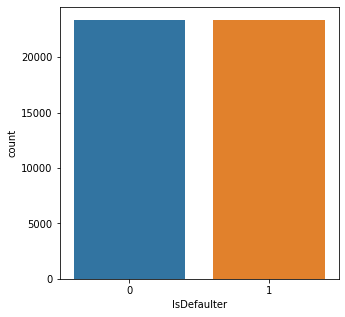

In [134]:
plt.figure(figsize=(5,5))
sns.countplot('IsDefaulter', data = balanced_df)

In [135]:
balanced_df.shape

(46728, 80)

In [136]:
balanced_df.drop('ID',axis = 1, inplace = True)

In [137]:
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Train Test Splitting

In [138]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [139]:
X.shape

(46728, 78)

In [140]:
y.shape

(46728,)

## Data Transformation

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [143]:
X_train.shape

(37382, 78)

In [144]:
X_test.shape

(9346, 78)

# **Model Implementation**

## **Logistic Regression Model**

In [145]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [146]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [147]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [148]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.828
The accuracy on test data is  0.831
The precision on test data is  0.795
The recall on test data is  0.857
The f1 on test data is  0.825
The roc_score on test data is  0.833


[[4052  621]
 [ 956 3717]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

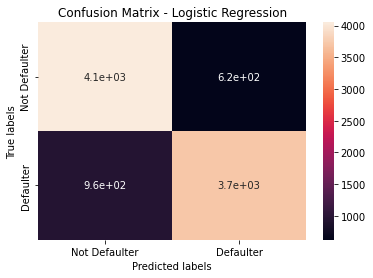

In [149]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree Classification**

In [150]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [151]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [152]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [153]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.791
The precision on test data is  0.81
The recall on test data is  0.781
The f1 on test data is  0.795
The roc_score on test data is  0.792


[[3611 1062]
 [ 889 3784]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

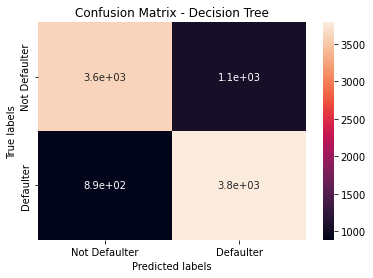

In [154]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Random Forest Classification**

In [155]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [156]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [157]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [158]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.863
The precision on test data is  0.821
The recall on test data is  0.897
The f1 on test data is  0.857
The roc_score on test data is  0.866


[[4234  439]
 [ 837 3836]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

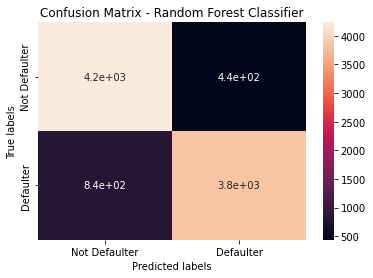

In [159]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Support Vector Machine**

In [160]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [161]:
#fitting data into Support Vector Classifier
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [162]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [163]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.848
The accuracy on test data is  0.84
The precision on test data is  0.765
The recall on test data is  0.9
The f1 on test data is  0.827
The roc_score on test data is  0.848


[[4276  397]
 [1098 3575]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

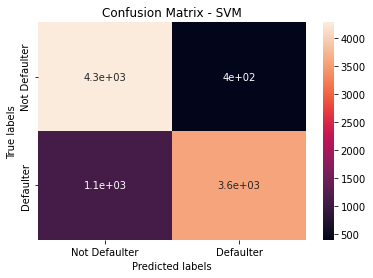

In [164]:
# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Gradient Boosting**

In [165]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [167]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [168]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.847
The accuracy on test data is  0.843
The precision on test data is  0.801
The recall on test data is  0.875
The f1 on test data is  0.836
The roc_score on test data is  0.846


[[4137  536]
 [ 929 3744]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

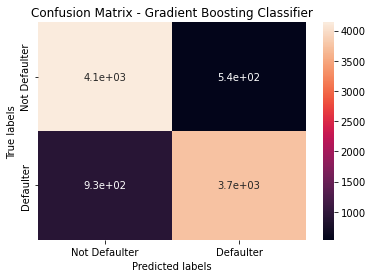

In [169]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **XG Boosting**

In [170]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [171]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [172]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [173]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.847
The accuracy on test data is  0.843
The precision on test data is  0.799
The recall on test data is  0.877
The f1 on test data is  0.836
The roc_score on test data is  0.846


[[4148  525]
 [ 939 3734]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

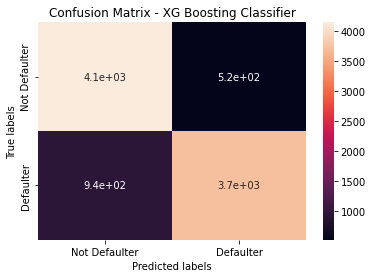

In [174]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)